Commands for installation

    conda install -c conda-forge assimulo



# Purpose: Demonstrate different behavior of IDA-Solver with index 1 and index 3 formulation. 

Considered System: Simple Pendulum.

Code mainly taken from


https://jmodelica.org/assimulo/tutorial_imp.html



In [1]:
import time
print(time.ctime())

# this is optional
%load_ext ipydex.displaytools
%matplotlib inline

Thu Jul  4 12:10:49 2019


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from assimulo.solvers import IDA # Imports the solver IDA from Assimulo
from assimulo.problem import Implicit_Problem # Imports the problem formulation from Assimulo

In [3]:

def residual_diff_part(t,y,yd):
    """
    Differential part of pendulum dynamics
    """
    res_0 = yd[0]-y[2]
    res_1 = yd[1]-y[3]
    res_2 = yd[2]+y[4]*y[0]
    res_3 = yd[3]+y[4]*y[1]+9.82
    
    return np.array([res_0, res_1, res_2, res_3])


def residual_index1(t,y,yd):
    """
    Index 1 formulation (2nd derivative of constraint with plugged in system dynamics)
    """

    res_4 = y[2]**2+y[3]**2-y[4]*(y[0]**2+y[1]**2)-y[1]*9.82 
    
    return np.concatenate((residual_diff_part(t, y, yd),[res_4]))


def residual_index3(t,y,yd):
    """
    Index 3 formulation (just the algebraic constraint)
    """
    res_4 = y[0]**2+y[1]**2-1
    
    return np.concatenate((residual_diff_part(t, y, yd),[res_4]))




In [4]:
# The initial conditions
t0  = 0.0 #Initial time
y0  = [1.0, 0.0, 0.0, 0.0, 0.0] #Initial states
yd0 = [0.0, 0.0, 0.0, -9.82, 0.0] #Initial state derivatives


# check if initial conditions are consistent
res0_1 = residual_index1(0, y0, yd0) ##:
res0_3 = residual_index3(0, y0, yd0) ##:

res0_1 := array([0., 0., 0., 0., 0.])

---


res0_3 := array([0., 0., 0., 0., 0.])

---


### Index 1 fromulation → works fine

No initialization defined for the problem.
No finalization defined for the problem.
Final Run Statistics: --- 

 Number of steps                                 : 1443
 Number of function evaluations                  : 1967
 Number of Jacobian evaluations                  : 77
 Number of function eval. due to Jacobian eval.  : 385
 Number of error test failures                   : 30
 Number of nonlinear iterations                  : 1967
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                       : IDA (BDF)
 Maximal order                : 5
 Suppressed algebr. variables : False
 Tolerances (absolute)        : 1e-06
 Tolerances (relative)        : 1e-06

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.03364781100026448 seconds.


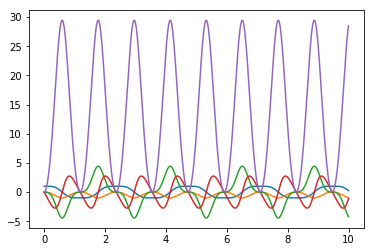

In [5]:
model = Implicit_Problem(residual_index1, y0, yd0, t0) # Create an Assimulo problem
sim = IDA(model)

# values <= 30 produce lots of output
sim.verbosity = 0

# no special options are set
# sim.algvar = [1, 1, 1, 1, 0]
# sim.suppress_alg = True


tfinal = 10           # Specify the final time
ncp = 500            # Number of communication points (number of return points)



t_sol, y_sol, yd_sol = sim.simulate(tfinal, ncp) # Use the .simulate method to simulate

plt.plot(t_sol, y_sol)
plt.show()

#### Check if algebraic constraint is repected during simulation (not perfect but OK)

Text(0.5,1,'Violation of algebraic constraint over simulation time.')

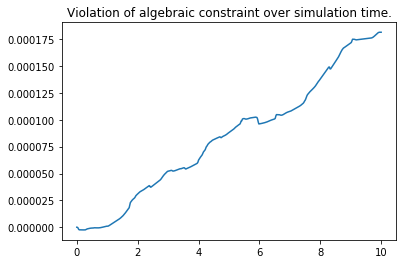

In [6]:
plt.plot(t_sol, np.sum(y_sol[:, :2]**2, axis=1) - 1)
plt.title("Violation of algebraic constraint over simulation time.")

### Index 3 with `algvar`-option set and short simulation time

No initialization defined for the problem.
No finalization defined for the problem.
Final Run Statistics: --- 

 Number of steps                                 : 49016
 Number of function evaluations                  : 194842
 Number of Jacobian evaluations                  : 96605
 Number of function eval. due to Jacobian eval.  : 483025
 Number of error test failures                   : 48232
 Number of nonlinear iterations                  : 194842
 Number of nonlinear convergence failures        : 26

Solver options:

 Solver                       : IDA (BDF)
 Maximal order                : 5
 Suppressed algebr. variables : True
 Tolerances (absolute)        : 1e-06
 Tolerances (relative)        : 1e-06

Simulation interval    : 0.0 - 0.3 seconds.
Elapsed simulation time: 4.6694608830002835 seconds.


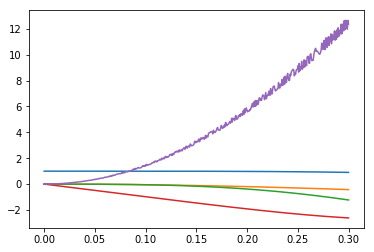

In [7]:


model = Implicit_Problem(residual_index3, y0, yd0, t0) # Create an Assimulo problem
sim = IDA(model)

# values <= 30 produce lots of output
sim.verbosity = 0
sim.algvar = [1, 1, 1, 1, 0]
sim.suppress_alg = True


tfinal = 0.3        # Specify the final time
ncp = 500            # Number of communication points (number of return points)



t_sol, y_sol, yd_sol = sim.simulate(tfinal, ncp) # Use the .simulate method to simulate

plt.plot(t_sol, y_sol)
plt.show()

#### Check if algebraic constraint is repected during simulation (very small (1e-8))

Text(0.5,1,'Violation of algebraic constraint over sim. time')

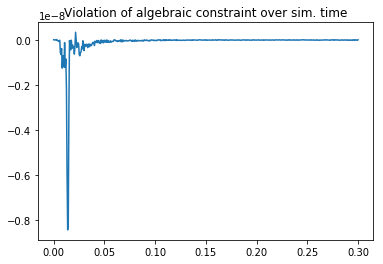

In [8]:
plt.plot(t_sol, np.sum(y_sol[:, :2]**2, axis=1) - 1)
plt.title("Violation of algebraic constraint over sim. time")

### Index 3 with `algvar`-option set and longer simulation time (→ disproportionate calculation time)

No initialization defined for the problem.
No finalization defined for the problem.
Final Run Statistics: --- 

 Number of steps                                 : 415814
 Number of function evaluations                  : 1652365
 Number of Jacobian evaluations                  : 821414
 Number of function eval. due to Jacobian eval.  : 4107070
 Number of error test failures                   : 410431
 Number of nonlinear iterations                  : 1652365
 Number of nonlinear convergence failures        : 103

Solver options:

 Solver                       : IDA (BDF)
 Maximal order                : 5
 Suppressed algebr. variables : True
 Tolerances (absolute)        : 1e-06
 Tolerances (relative)        : 1e-06

Simulation interval    : 0.0 - 1.0 seconds.
Elapsed simulation time: 36.59644423999998 seconds.


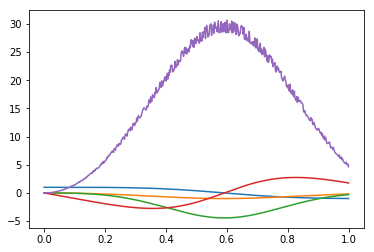

In [9]:


model = Implicit_Problem(residual_index3, y0, yd0, t0) # Create an Assimulo problem
sim = IDA(model)

# values <= 30 produce lots of output
sim.verbosity = 0
sim.algvar = [1, 1, 1, 1, 0]
sim.suppress_alg = True


tfinal = 1           # Specify the final time
ncp = 500            # Number of communication points (number of return points)



t_sol, y_sol, yd_sol = sim.simulate(tfinal, ncp) # Use the .simulate method to simulate

plt.plot(t_sol, y_sol)
plt.show()

### Index 3 without `algvar`-option set → error

In [10]:
model = Implicit_Problem(residual_index3, y0, yd0, t0) # Create an Assimulo problem
sim = IDA(model)

# values <= 30 produce lots of output
sim.verbosity = 0

# now these options are not set
# sim.algvar = [1, 1, 1, 1, 0]
# sim.suppress_alg = True


tfinal = 1           # Specify the final time
ncp = 500            # Number of communication points (number of return points)



t_sol, y_sol, yd_sol = sim.simulate(tfinal, ncp) # Use the .simulate method to simulate

plt.plot(t_sol, y_sol)
plt.show()

No initialization defined for the problem.


IDAError: 'Error test failures occurred too many times during one internal time step or minimum step size was reached. At time 0.000000.'